In [1]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
!pip install pmdarima
sns.set()

In [2]:
url = "E:/Udemy Courses/Time Series Analysis in Python/Section 3/us.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [4]:
df.columns

Index(['date', 'cases', 'deaths'], dtype='object')

In [5]:
df_mean = df.asfreq(freq="W", method='bfill')

In [6]:
df.head()
df.set_index("date", inplace=True)
del df['deaths']

In [7]:
timeseries = df_mean["cases"]

In [8]:
print("p-value:", adfuller(df.dropna())[1])

p-value: 0.7652088763526638


In [9]:
from pmdarima.arima import auto_arima

In [10]:
model_auto = auto_arima(df[1:])

In [11]:
model_auto

ARIMA(order=(1, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  558
Model:               SARIMAX(1, 2, 2)   Log Likelihood               -6193.353
Date:                Wed, 04 Aug 2021   AIC                          12394.707
Time:                        16:05:03   BIC                          12411.990
Sample:                             0   HQIC                         12401.457
                                - 558                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8694      0.038    -22.773      0.000      -0.944      -0.795
ma.L1          0.3047      0.038      7.966      0.000       0.230       0.380
ma.L2         -0.5865      0.022    -26.413      0.000      -0.630      -0.543
sigma2       2.75e+08   5.49e-11   5.01e+18      0.000    2.75e+08    2.75e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):              1377.47
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):              19.08   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.08e+34. Standard errors may be unstable.
"""

In [13]:
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=8677.251, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8786.404, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=8705.357, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=8676.165, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=8678.113, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=8677.882, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=8675.445, Time=0.09 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=8681.826, Time=0.13 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=8680.787, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=8679.801, Time=0.10 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=8677.108, Time=0.10 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 1.400 seconds


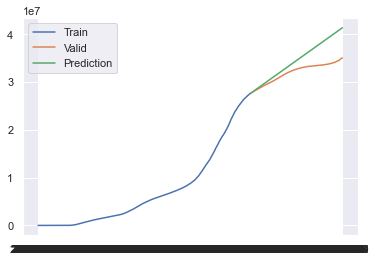

In [16]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


In [37]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

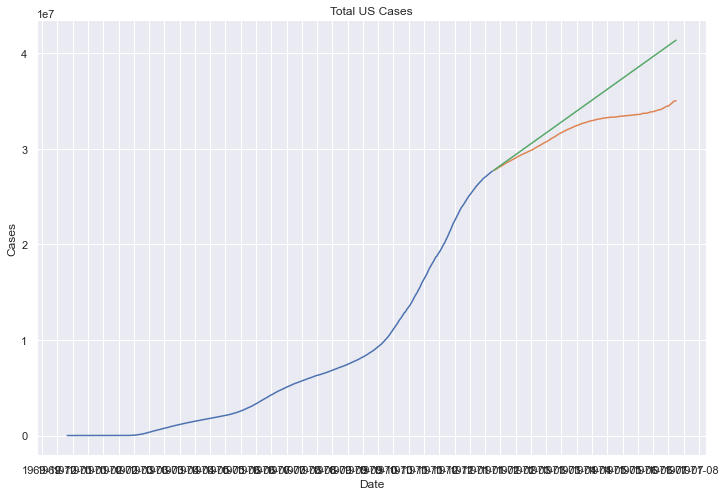

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='Train')
ax.plot(valid, label='Actual')
ax.plot(forecast, label='Prediction')
ax.set(xlabel="Date", ylabel="Cases",
       title="Total US Cases")

date_form = DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.show()